We are going to re-create a FiveThirtyEight analysis for this assignment.

The data can be found here:  

[https://github.com/fivethirtyeight/data/blob/master/bob-ross/elements-by-episode.csv](https://github.com/fivethirtyeight/data/blob/master/bob-ross/elements-by-episode.csv)

Using the data, re-create this figure from the article:

<img src="https://fivethirtyeight.com/wp-content/uploads/2014/04/hickey-ross-tags-1.png" style="width: 500px" />

In your version of this figure,

1. **Don't worry about using the variable names exactly as in the article (_i.e._ just use the column names from the original data).**
1. **Plot counts instead of percentages.**
1. **Only show the top ten categories by count and group the remaining categories into a category named 'Other'.** 

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0          ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0.9000     ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



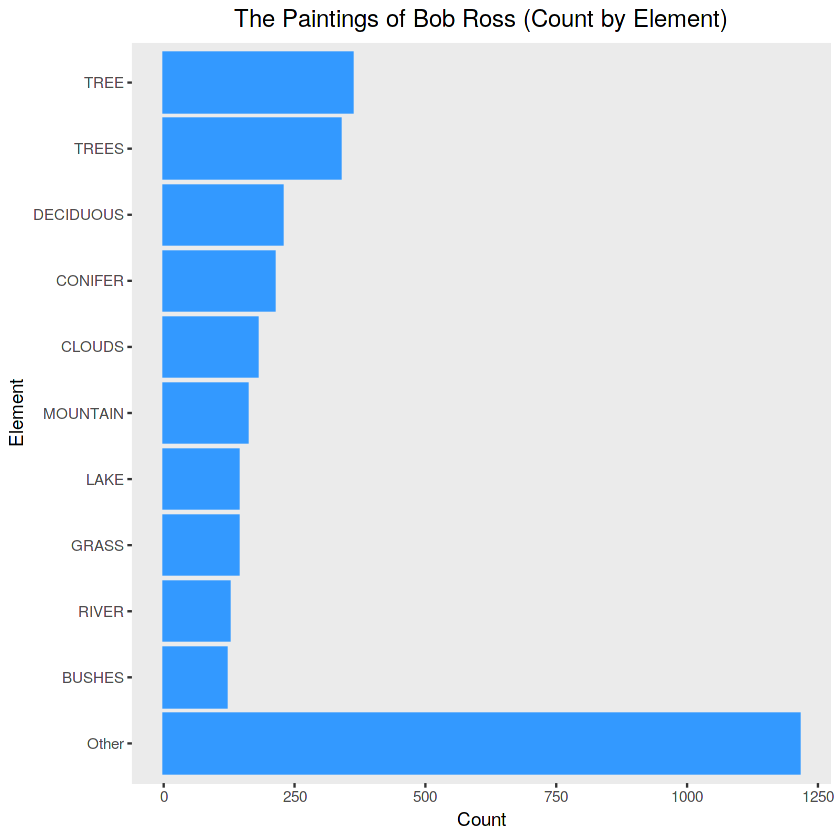

In [1]:
library('tidyverse')

df = read.csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/bob-ross/elements-by-episode.csv')

df = df %>% pivot_longer(cols = -one_of('EPISODE','TITLE')) %>%
    filter(value>0) %>% 
    mutate(name=fct_infreq(name) %>% fct_lump(n = 10) %>% fct_rev) 
          
p = ggplot(df, aes(x=name))
p = p + geom_bar(color="#3399FF", fill="#3399FF") + coord_flip() 
p = p + ggtitle("The Paintings of Bob Ross (Count by Element)") +
  xlab("Element") + ylab("Count")
p = p + theme(panel.border = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(), 
plot.title = element_text(hjust = 0.5, size=14)) 
p